In [1]:
%matplotlib inline
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

### –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ú–ù–ö –∏ –ú–ù–ú –¥–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
–ù–∞–π—Ç–∏ –æ—Ü–µ–Ω–∫–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ $ ùë¶_i = ùëé + ùëèùë•_i + ùëí $
,
–∏—Å–ø–æ–ª—å–∑—É—è 20 —Ç–æ—á–µ–∫ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ [-1.8; 2] —Å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º —à–∞–≥–æ–º —Ä–∞–≤–Ω—ã–º
0.2. –û—à–∏–±–∫—É $ùëí_{i}$ —Å—á–∏—Ç–∞—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–π —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ (0,
1). –í –∫–∞—á–µ—Å—Ç–≤–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –≤–∑—è—Ç—å $ ùë¶_i = 2 + 2ùë• + ùëí_i $
. –ü—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–∏ –æ—Ü–µ–Ω–æ–∫ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–≤–∞ –∫—Ä–∏—Ç–µ—Ä–∏—è: –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –∏ –∫—Ä–∏—Ç–µ—Ä–∏–π –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –º–æ–¥—É–ª–µ–π. –ü—Ä–æ–¥–µ–ª–∞—Ç—å —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –≤—ã–±–æ—Ä–∫–∏, —É –∫–æ—Ç–æ—Ä–æ–π –≤ –∑–Ω–∞—á–µ–Ω–∏—è $ùë¶_1$ –∏ $ùë¶_{20}$ –≤–Ω–æ—Å—è—Ç—Å—è
–≤–æ–∑–º—É—â–µ–Ω–∏—è 10 –∏ -10.

In [2]:
def rq(x,y):
    n1 = 0
    n2 = 0
    n3 = 0
    n4 = 0
    
    x_med = np.median(x)
    y_med = np.median(y)
 
    for i in range(len(x)):
        if (x[i] >= x_med) and (y[i] >= y_med):
            n1 += 1
        if (x[i] < x_med) and (y[i] >= y_med):
            n2 += 1
        if (x[i] < x_med) and (y[i] < y_med):
            n3 += 1
        if (x[i] >= x_med) and (y[i] < y_med):
            n4 += 1
    return ((n1 + n3) - (n2 + n4))/len(x)

–ö–ª–∞—Å—Å –∫–æ—Ç–æ—Ä—ã–π —Ä–µ–∞–ª–∏–∑—É–µ—Ç –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –ú–ù–ö –∏ –ú–ù–ú

In [3]:
class Linear():
    def __init__(self):
        self.B0 = 0
        self.B1 = 0
    
    def train(self,x,y,method):
        
        # –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–º –º–µ—Ç–æ–¥–æ–º –ú–ù–ö (–º–µ—Ç–æ–¥ –Ω–∞–∏–º–µ–Ω—å—à–Ω–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤) y = B0 + B1*x
        if method == "MNK":
            self.B1 = ((x * y).mean() - x.mean() * y.mean())/((x * x).mean() - (x.mean())**2)
            self.B0 = y.mean() - x.mean()*self.B1
            
        
        #–ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–µ—Ç–æ–¥–æ–º –ú–ù–ú
        if method == "MNM":
            self.B1 = rq(x,y) * ((np.quantile(y,3/4) - np.quantile(y,1/4))/(len(y) * 0.5) / ((np.quantile(x,3/4) - np.quantile(x,1/4))/(len(x)*0.5))) 
            self.B0 = np.median(y) - self.B1*np.median(x)
            
    def predict(self,x):
        return self.B0 + self.B1 * x  

–ö—Ä–∏—Ç–µ—Ä–∏–π –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ—Å—Ç–∏ –ø–æ $l^2$ –Ω–æ—Ä–º–µ

In [4]:
def distance(y1,y2):
    return sum([abs(y1[i] - y2[i]) ** 2 for i in range(len(y1))])

–ë–µ–∑ –≤–æ–∑–º—É—â–µ–Ω–∏–π

MNK
B0 :2.3525332727729014
B1 :1.604929200142259
MNM
B0 :2.245614251129639
B1 :0.8538307992578928


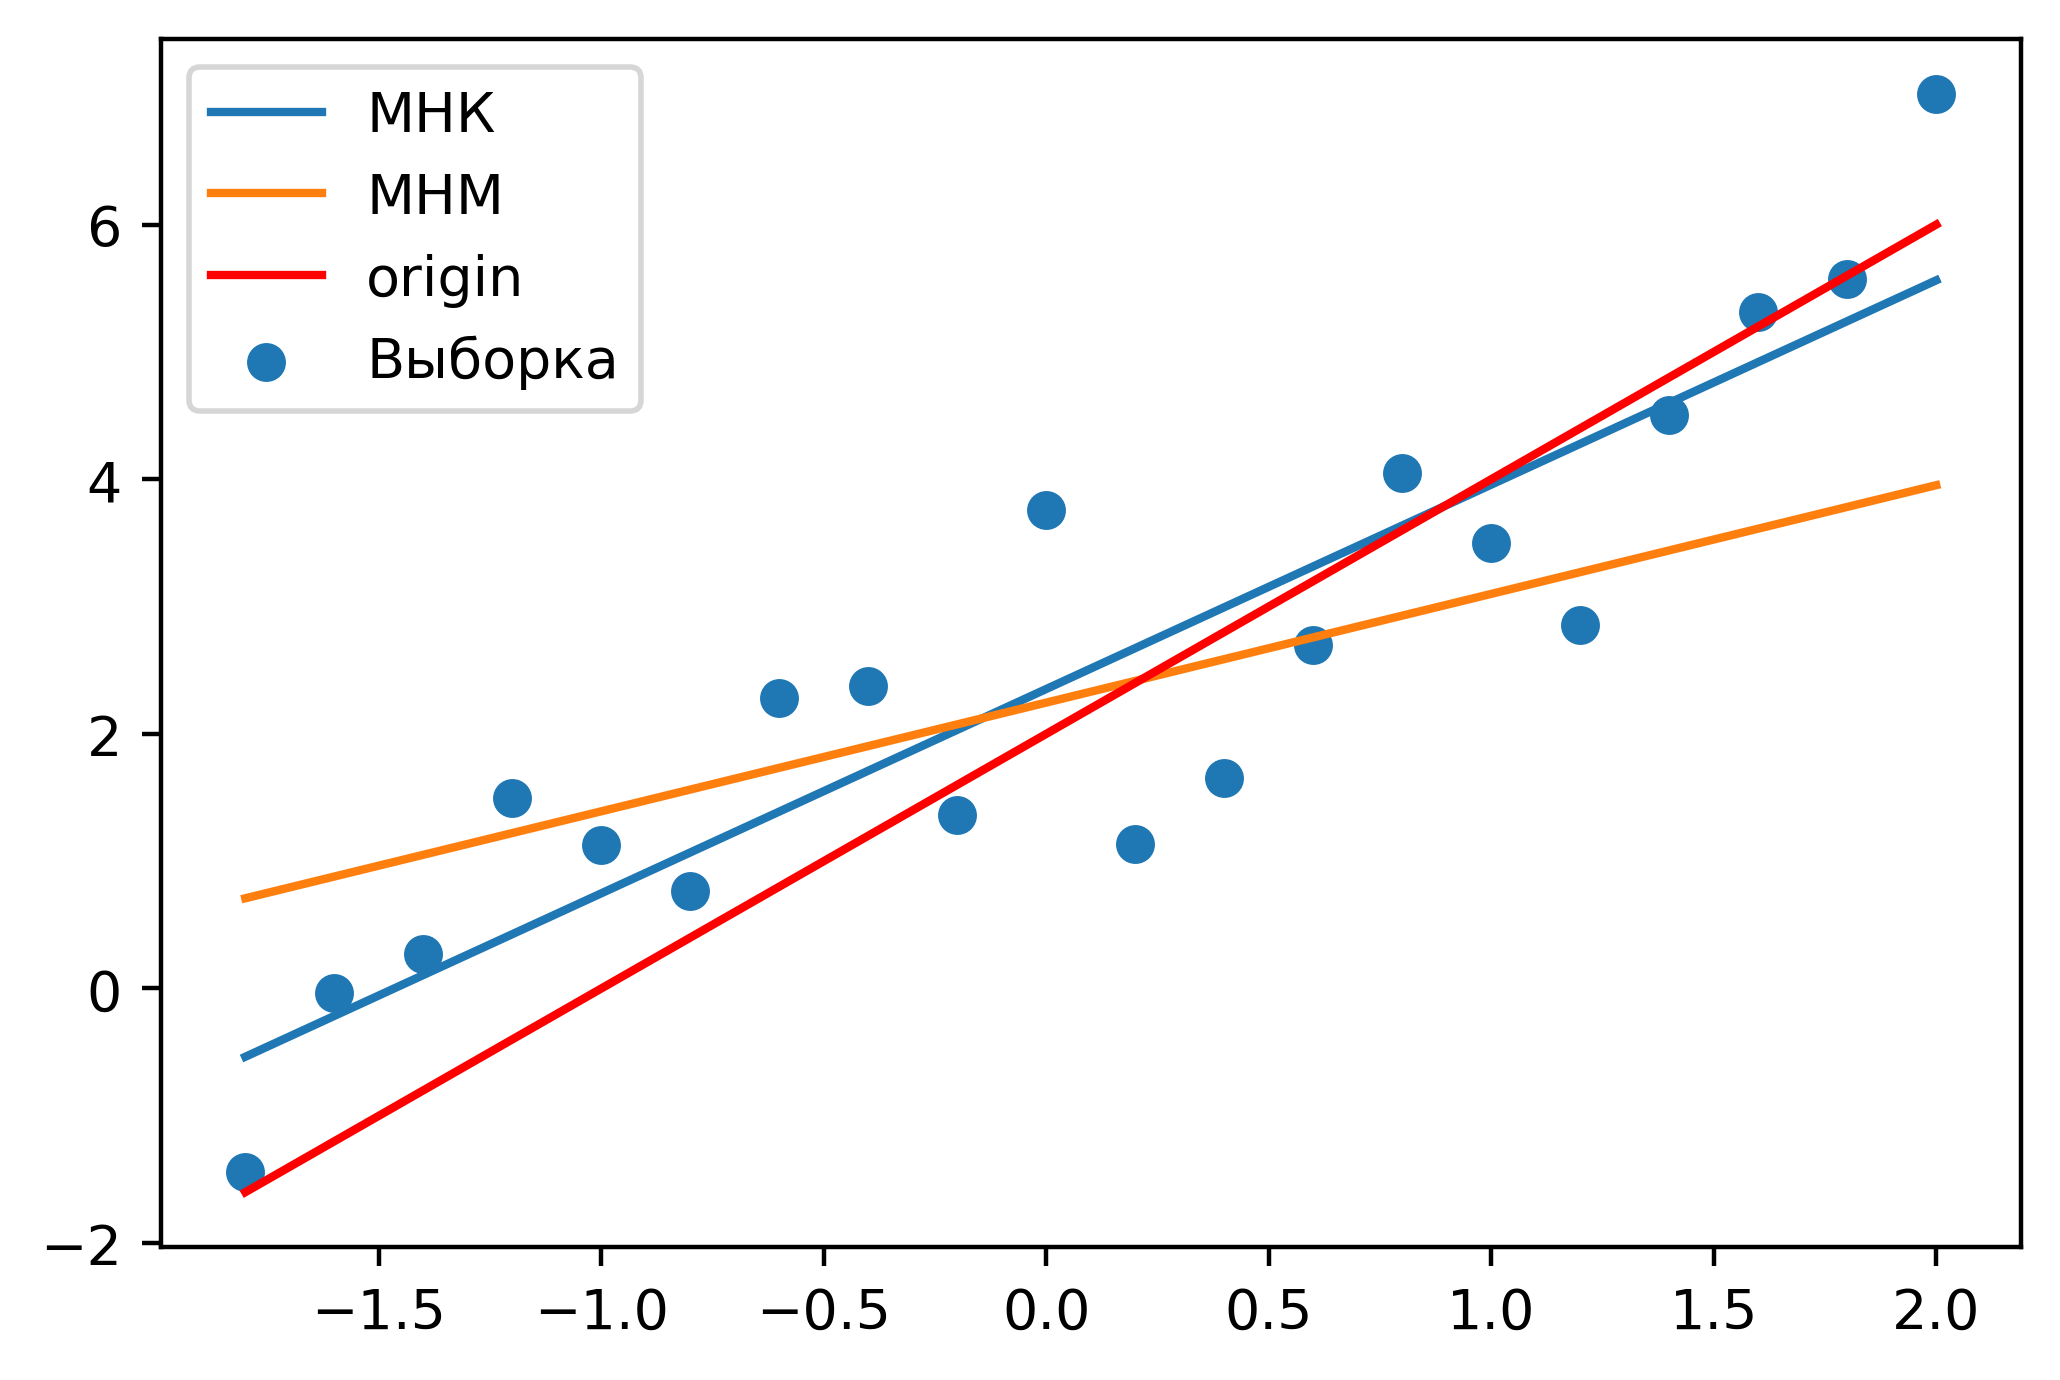

distance MNK 57.538080688291295
distance MNM 322.7743184299721


In [7]:
# –≥—Ä–∞–Ω–∏—Ü—ã 
a = -1.8 
b = 2

# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
n = 20

# –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–∞—è –æ—à–∏–±–∫–∞
e = st.norm.rvs(size=n)

x_train = np.linspace(a,b,n)
x_predict = np.linspace(a,b,200)

# –∏—Å—Ç–∏–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Å –æ—à—Ç–±–∫–æ–π
y_train = 2 + 2 * x_train + e
plt.scatter(x= x_train,y= y_train,label="–í—ã–±–æ—Ä–∫–∞")


#MNK
Lin = Linear()
Lin.train(x_train,y_train,method="MNK")
y_predict_MNK = Lin.predict(x_predict)
plt.plot(x_predict,y_predict_MNK,label="–ú–ù–ö")

print("MNK")
print("B0 :" + str(Lin.B0))
print("B1 :" + str(Lin.B1))

#MNM
Lin.train(x_train,y_train,method="MNM")
y_predict_MNM = Lin.predict(x_predict)
plt.plot(x_predict ,y_predict_MNM,label="–ú–ù–ú")

print("MNM")
print("B0 :" + str(Lin.B0))
print("B1 :" + str(Lin.B1))


#original
y_origin = 2 + 2*x_predict
plt.plot(x_predict, y_origin,c="r", label = "origin")
plt.legend()
plt.show()

# opt of method
print("distance MNK " + str(distance(y_predict_MNK,y_origin)))
print("distance MNM " +  str(distance(y_predict_MNM,y_origin)))

–° –≤–æ–∑–º—É—â–µ–Ω–∏—è–º–∏

MNK
B0 :1.7628390069358828
B1 :0.6667207200792042
MNM
B0 :1.6995741519092726
B1 :1.0393946136066972


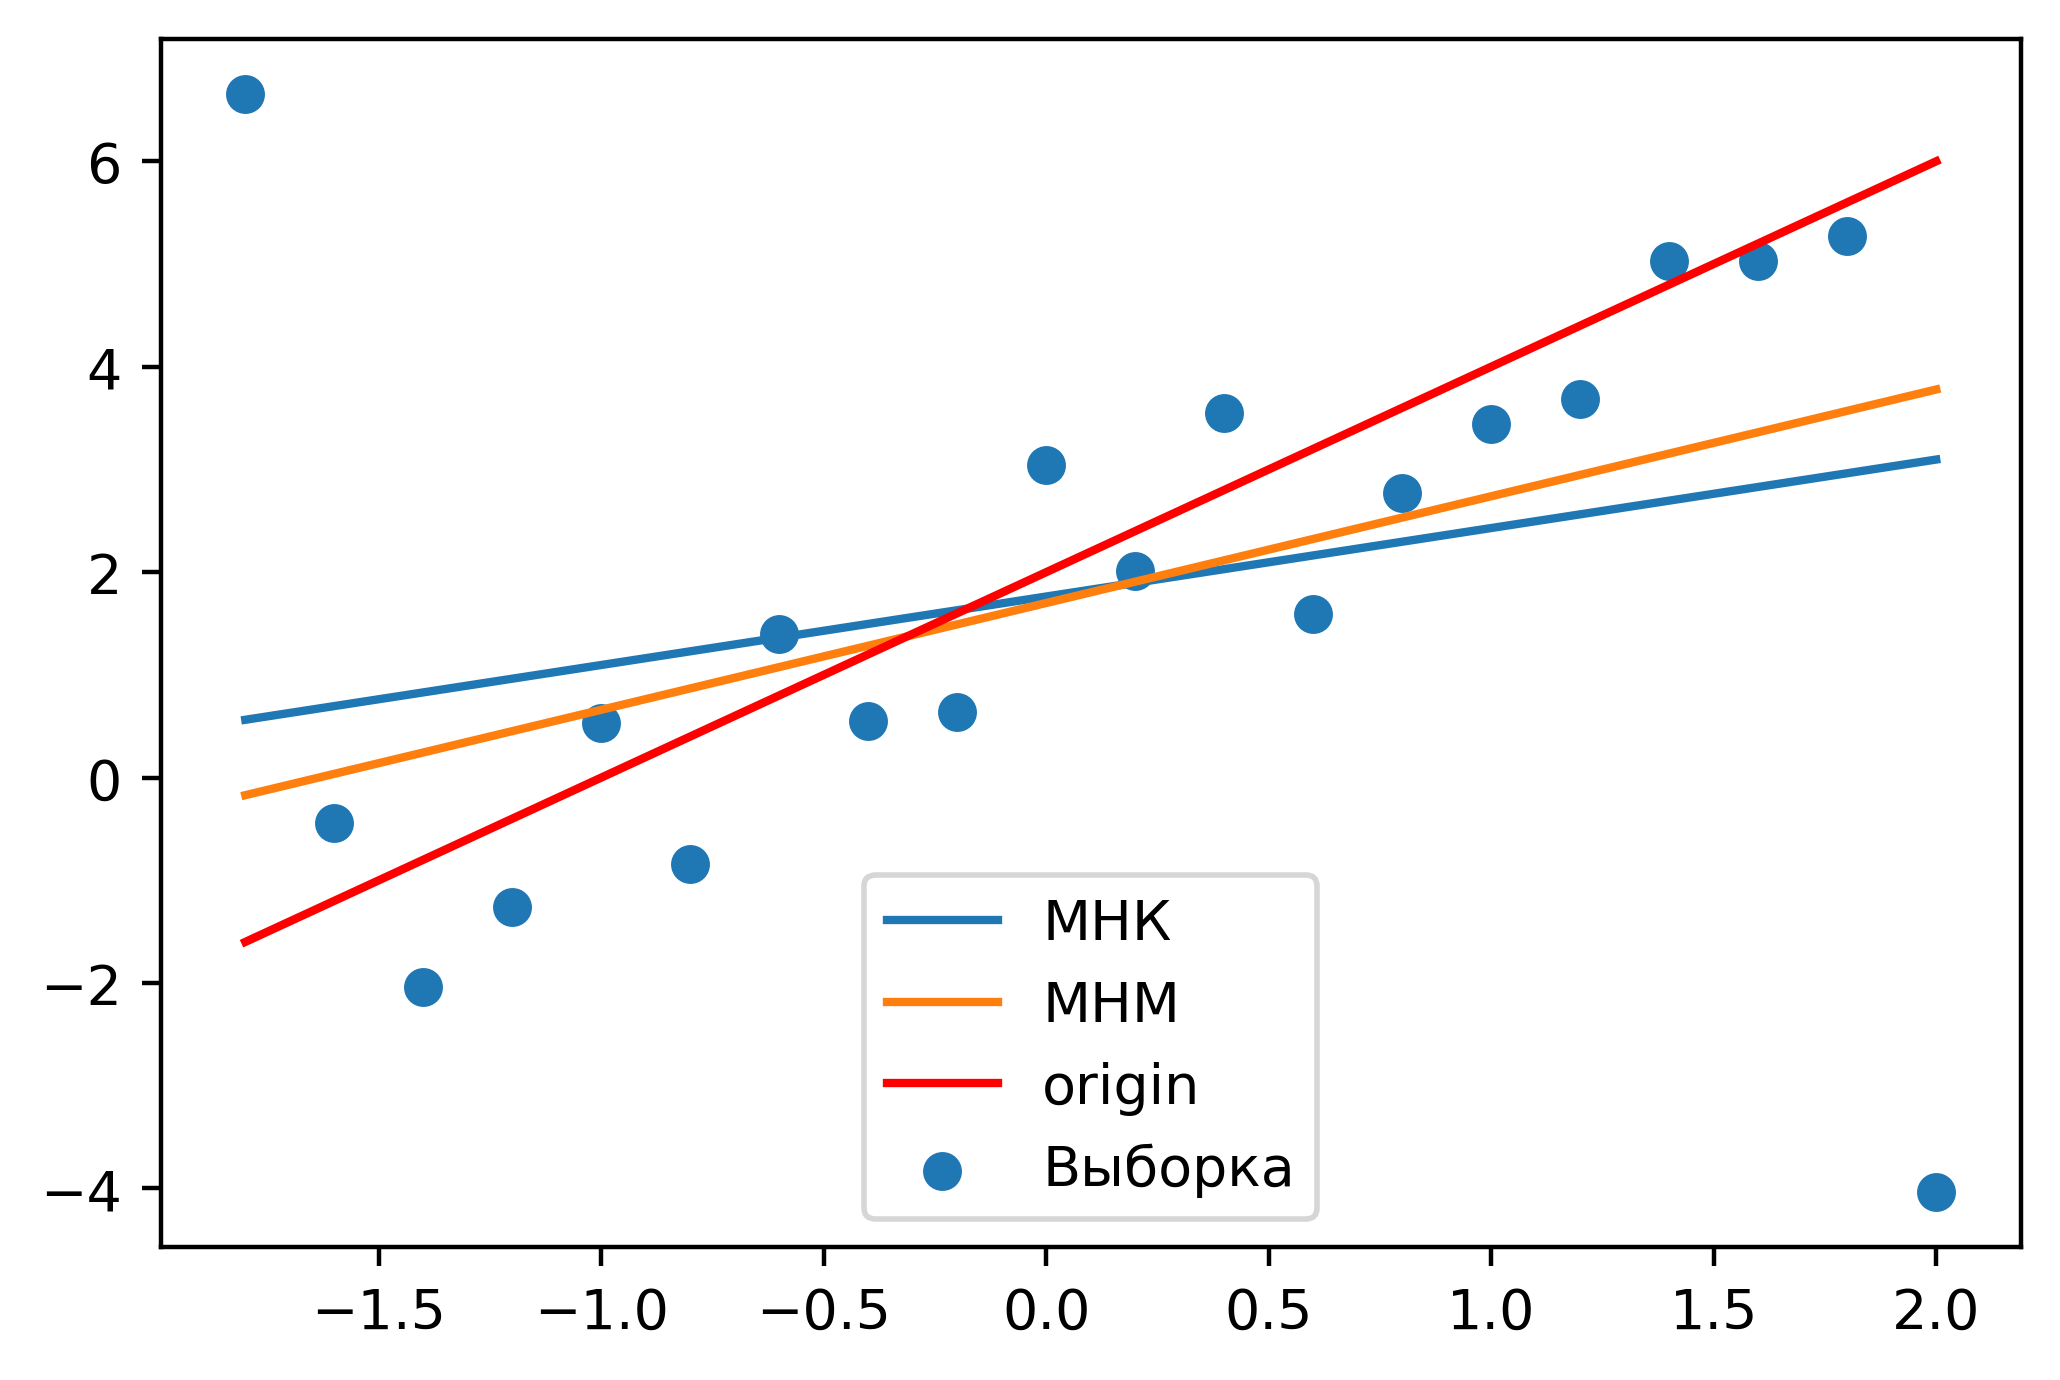

distance MNK 459.56924037374546
distance MNM 255.75045808091986


In [8]:
# –≥—Ä–∞–Ω–∏—Ü—ã 
a = -1.8 
b = 2

# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
n = 20

# –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–∞—è –æ—à–∏–±–∫–∞
e = st.norm.rvs(size=n)

x_train = np.linspace(a,b,n)
x_predict = np.linspace(a,b,200)

# –∏—Å—Ç–∏–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è
y_train = 2 + 2 * x_train + e

# –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø–æ–º–µ—Ö
y_train[0] += 10
y_train[-1]  -= 10


plt.scatter(x= x_train,y= y_train,label="–í—ã–±–æ—Ä–∫–∞")


#MNK
Lin = Linear()
Lin.train(x_train,y_train,method="MNK")
y_predict_MNK = Lin.predict(x_predict)
plt.plot(x_predict,y_predict_MNK,label="–ú–ù–ö")

print("MNK")
print("B0 :" + str(Lin.B0))
print("B1 :" + str(Lin.B1))

#MNM
Lin.train(x_train,y_train,method="MNM")
y_predict_MNM = Lin.predict(x_predict)
plt.plot(x_predict ,y_predict_MNM,label="–ú–ù–ú")

print("MNM")
print("B0 :" + str(Lin.B0))
print("B1 :" + str(Lin.B1))


#original
y_origin = 2 + 2*x_predict
plt.plot(x_predict, y_origin,c="r", label = "origin")
plt.legend()
plt.show()

# opt of method
print("distance MNK " + str(distance(y_predict_MNK,y_origin)))
print("distance MNM " +  str(distance(y_predict_MNM,y_origin)))